In [4]:
import fastf1 as ff1
from fastf1 import plotting
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# Enable the cache by providing the name of the cache folder, speed up
ff1.Cache.enable_cache('cache')

# Setup plotting, setup the plot (bg: black, ...)
plotting.setup_mpl()

In [6]:
session = ff1.get_session(2024, 'Monaco', 'R')
session.load()

core           INFO 	Loading data for Monaco Grand Prix - Race [v3.3.6]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '81', '55', '4', '63', '1', '44', '22', '23', '10', '14', '3', '77', '18', '2', '24', '31', '11', '27', '20']


In [7]:
driver = 'SAI'
# fastest lap of the driver
fastest_driver = session.laps.pick_driver(driver).pick_fastest()
telemetry_driver = fastest_driver.get_telemetry().add_distance()


core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [8]:
v = telemetry_driver['Speed'] / 3.6     # km/h > m/s
time_float = telemetry_driver['Time'] / np.timedelta64(1, 's')  # dd > seconds

# longitudinal acceleration
ax = np.gradient(v) / np.gradient(time_float)   # sottrae istante corrente da istante precedente
ax_smooth = np.convolve(ax, np.ones((3,))/3, mode = 'same') # valore oscilla troppo, si visualizza meglio

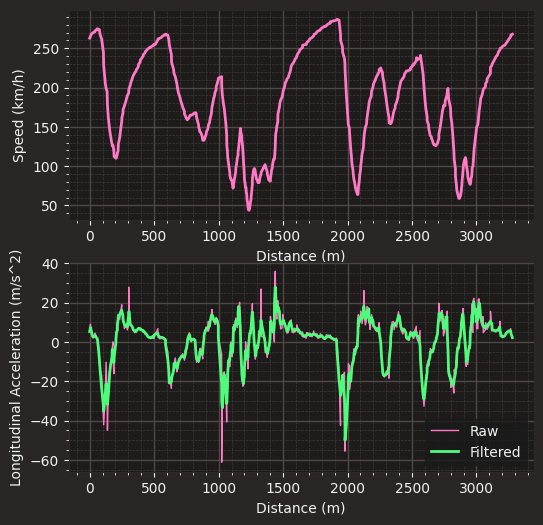

In [9]:
fig, axes = plt.subplots(2, 1, figsize=(6, 6))
axes[0].plot(telemetry_driver['Distance'], telemetry_driver['Speed'], linewidth = 2)
axes[0].set(xlabel = "Distance (m)", ylabel = "Speed (km/h)")

axes[1].plot(telemetry_driver['Distance'], ax, linewidth = 1, label = 'Raw')
axes[1].plot(telemetry_driver['Distance'], ax_smooth, linewidth = 2, label = 'Filtered')
axes[1].set(xlabel = "Distance (m)", ylabel = "Longitudinal Acceleration (m/s^2)")
axes[1].legend()

In [10]:
driver = '16'
# fastest lap of the driver
lap = session.laps.pick_driver(driver).pick_fastest()

telemetry_lap = lap.get_telemetry().add_distance()



core        WARNING 	Failed to preserve data type for column 'X' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Y' while merging telemetry.
core        WARNING 	Failed to preserve data type for column 'Z' while merging telemetry.


In [11]:
v = telemetry_lap['Speed'] / 3.6     # km/h > m/s
time_float = telemetry_lap['Time'] / np.timedelta64(1, 's')  # dd > seconds

[Text(0.5, 0, 'Distance (m)'), Text(0, 0.5, 'Speed (km/h)')]

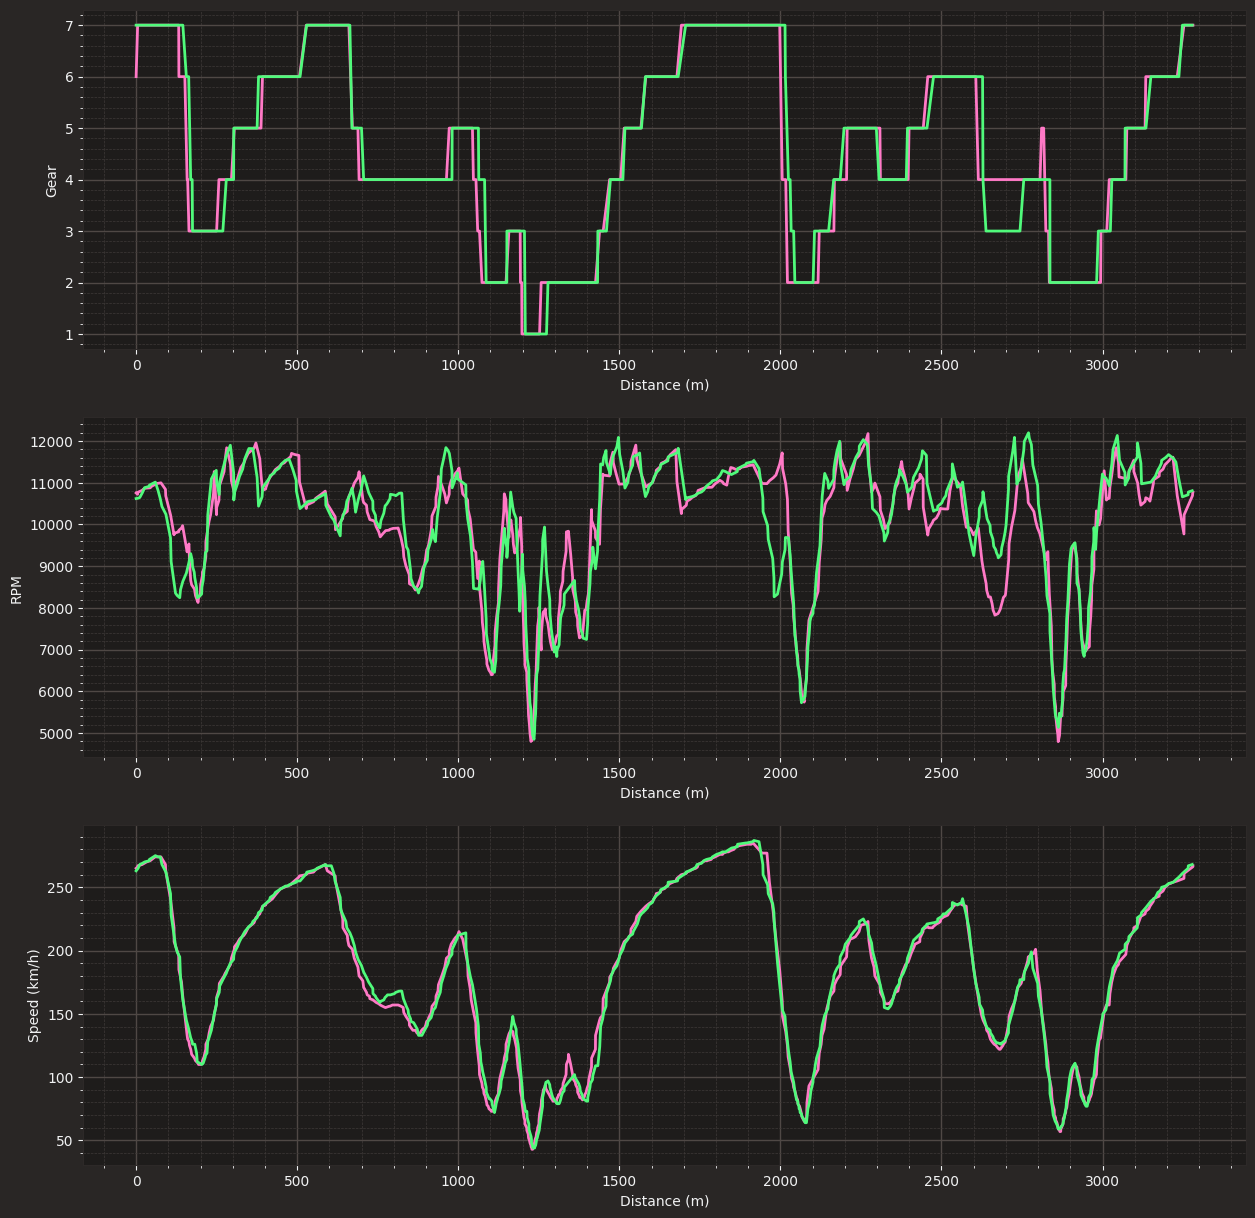

In [12]:
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].plot(telemetry_lap['Distance'], telemetry_lap['nGear'], linewidth = 2)
axes[0].plot(telemetry_driver['Distance'], telemetry_driver['nGear'], linewidth = 2)
axes[0].set(xlabel = "Distance (m)", ylabel = "Gear")

axes[1].plot(telemetry_lap['Distance'], telemetry_lap['RPM'], linewidth = 2)
axes[1].plot(telemetry_driver['Distance'], telemetry_driver['RPM'], linewidth = 2)
axes[1].set(xlabel = "Distance (m)", ylabel = "RPM")

axes[2].plot(telemetry_lap['Distance'], telemetry_lap['Speed'], linewidth = 2)
axes[2].plot(telemetry_driver['Distance'], telemetry_driver['Speed'], linewidth = 2)
axes[2].set(xlabel = "Distance (m)", ylabel = "Speed (km/h)")




In [13]:
telemetry_lap

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,RelativeDistance,Status,X,Y,Z,Distance
2,2024-05-26 15:16:15.159,0 days 03:08:09.770000,,NaN,0 days 00:00:00,10756,265,6,100,False,0,interpolation,0.000024,OnTrack,-7663.891727,-6576.294980,501.786078,0.000000
3,2024-05-26 15:16:15.223,0 days 03:08:09.834000,,NaN,0 days 00:00:00.064000,10724,266,7,100,False,0,car,0.001464,OnTrack,-7666.650100,-6528.929939,501.967169,4.728889
4,2024-05-26 15:16:15.231,0 days 03:08:09.842000,,NaN,0 days 00:00:00.072000,10771,267,7,100,False,0,pos,0.001644,OnTrack,-7667.000000,-6523.000000,502.000000,5.322222
5,2024-05-26 15:16:15.411,0 days 03:08:10.022000,,NaN,0 days 00:00:00.252000,10818,268,7,100,False,0,pos,0.005720,OnTrack,-7675.000000,-6390.000000,503.000000,18.722222
6,2024-05-26 15:16:15.503,0 days 03:08:10.114000,,NaN,0 days 00:00:00.344000,10866,269,7,100,False,0,car,0.007811,OnTrack,-7678.861181,-6324.118213,503.084148,25.596667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569,2024-05-26 15:17:29.943,0 days 03:09:24.554000,,NaN,0 days 00:01:14.784000,9773,257,7,100,False,0,car,0.987415,OnTrack,-7650.551435,-6790.358455,502.020964,3252.757500
570,2024-05-26 15:17:29.951,0 days 03:09:24.562000,,NaN,0 days 00:01:14.792000,10232,261,7,100,False,0,pos,0.987591,OnTrack,-7651.000000,-6784.000000,502.000000,3253.337500
571,2024-05-26 15:17:30.303,0 days 03:09:24.914000,,NaN,0 days 00:01:15.144000,10692,266,7,100,False,0,car,0.995484,OnTrack,-7662.748212,-6599.175046,501.978793,3279.346389
572,2024-05-26 15:17:30.310,0 days 03:09:24.921000,,NaN,0 days 00:01:15.151000,10746,267,7,100,False,0,pos,0.995641,OnTrack,-7663.000000,-6595.000000,502.000000,3279.865556


In [14]:
distance_series = telemetry_lap['Distance']
difference_series = (distance_series - 1950).abs()
closest_index = difference_series.idxmin()

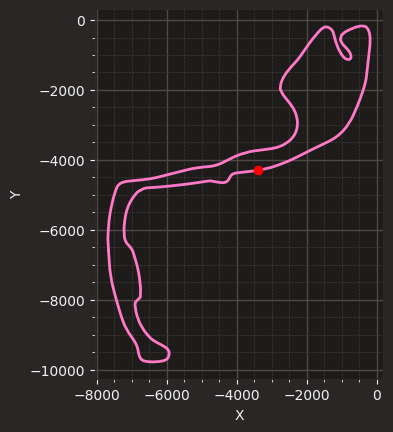

In [20]:
fig, axes = plt.subplots()

axes.plot(telemetry_lap['X'], telemetry_lap['Y'], linewidth = 2)
axes.plot(telemetry_lap['X'].iloc[closest_index], telemetry_lap['Y'].iloc[closest_index], 'ro')

axes.set(xlabel = "X", ylabel = "Y")

axes.set_aspect('equal', adjustable='box')


In [16]:
from mpl_toolkits.mplot3d import Axes3D


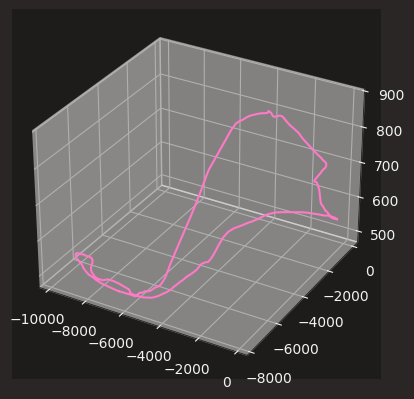

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X = telemetry_lap['X']
Y = telemetry_lap['Y']
Z = telemetry_lap['Z']

ax.plot(Y, X, Z, label='track')

plt.show()